In [2]:
from google.colab import files
uploaded = files.upload()

Saving predator_results.csv to predator_results.csv


In [5]:
import pandas as pd

df = pd.read_csv("predator_results.csv")
df.head()

,[all run data],[step],sheep_population,wolf_population
0,NaN,0,100,50
1,NaN,1,102,49
2,NaN,2,105,48
3,NaN,3,106,50
4,NaN,4,109,51


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [14]:
df.columns = df.columns.str.strip()     # removes hidden spaces
df.columns = df.columns.str.replace('[','')
df.columns = df.columns.str.replace(']','')

print(df.columns)
X = df[['sheep_population', 'wolf_population']]
y = df['step']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Index(['all run data', 'step', 'sheep_population', 'wolf_population'], dtype='object')


In [12]:
df = pd.read_csv("predator_results.csv")
print(df.columns.tolist())
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['[all run data]', '[step]', 'sheep_population', 'wolf_population']
['[all run data]', '[step]', 'sheep_population', 'wolf_population']


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    results.append([name, mse])

In [17]:
import pandas as pd

results_df = pd.DataFrame(results, columns=["Model", "MSE"])
results_df = results_df.sort_values(by="MSE")

results_df

,Model,MSE
2,Random Forest,1.060577
3,KNN,1.652903
1,Decision Tree,2.774194
4,SVR,517.385313
0,Linear Regression,533.300051


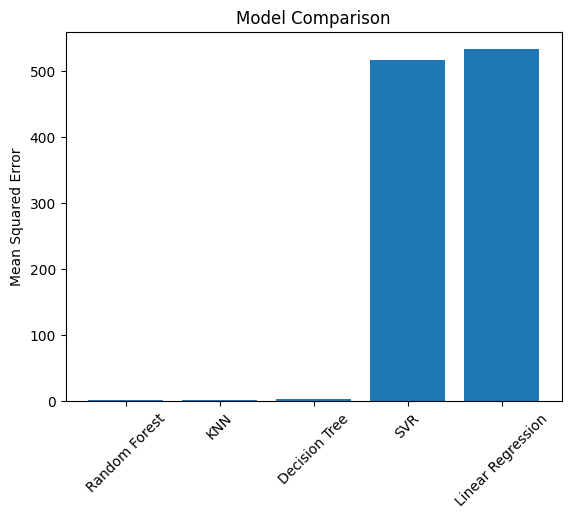

In [18]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(results_df["Model"], results_df["MSE"])
plt.xticks(rotation=45)
plt.title("Model Comparison")
plt.ylabel("Mean Squared Error")
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    results.append([name, mse, rmse, mae, r2])

In [21]:
results_df = pd.DataFrame(
    results,
    columns=["Model", "MSE", "RMSE", "MAE", "R2 Score"]
)

results_df = results_df.sort_values(by="MSE")
results_df

,Model,MSE,RMSE,MAE,R2 Score
2,Random Forest,1.230700,1.109369,0.934516,0.999364
3,KNN,1.652903,1.285653,1.038710,0.999146
1,Decision Tree,2.000000,1.414214,1.290323,0.998967
4,SVR,517.385313,22.746105,16.282032,0.732743
0,Linear Regression,533.300051,23.093290,18.209826,0.724522
